In [3]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
from scipy import fft, signal
import scipy
from scipy.io.wavfile import read
from pydub import AudioSegment
import pandas as pd
import wave
from matplotlib import pyplot as plt
import scipy.fftpack as fourier
import glob
from typing import List, Dict, Tuple
from tqdm import tqdm
import pickle

#  Convirtiendo de mp3 a .wav

In [ ]:
# Archivos mp3                                                                       
src = "AtlantaBlues_LuisArmstrong.mp3"
dst = "AtlantaBlues_LuisArmstrong.wav"

# convert wav to mp3                                                            
audSeg = AudioSegment.from_mp3("AtlantaBlues_LuisArmstrong.mp3")
audSeg.export(dst, format="wav")

<_io.BufferedRandom name='AtlantaBlues_LuisArmstrong.wav'>

In [ ]:
src = "DontMakeItLookEasy_MeghanTrainor.mp3"
dst = "DontMakeItLookEasy_MeghanTrainor.wav"
                                                           
audSeg = AudioSegment.from_mp3("DontMakeItLookEasy_MeghanTrainor.mp3")
audSeg.export(dst, format="wav")

<_io.BufferedRandom name='DontMakeItLookEasy_MeghanTrainor.wav'>

In [ ]:
src = "ItsOnlyAPaperMoon_NatKingCole.mp3"
dst = "ItsOnlyAPaperMoon_NatKingCole.wav"
                                                            
audSeg = AudioSegment.from_mp3("ItsOnlyAPaperMoon_NatKingCole.mp3")
audSeg.export(dst, format="wav")

<_io.BufferedRandom name='ItsOnlyAPaperMoon_NatKingCole.wav'>

In [ ]:
src = "MillionDollarBaby_AvaMax.mp3"
dst = "MillionDollarBaby_AvaMax.wav"
                                                           
audSeg = AudioSegment.from_mp3("MillionDollarBaby_AvaMax.mp3")
audSeg.export(dst, format="wav")

<_io.BufferedRandom name='MillionDollarBaby_AvaMax.wav'>

In [ ]:
src = "SoFarSoGood_DukeEllington.mp3"
dst = "SoFarSoGood_DukeEllington.wav"
                                                         
audSeg = AudioSegment.from_mp3("SoFarSoGood_DukeEllington.mp3")
audSeg.export(dst, format="wav")

<_io.BufferedRandom name='SoFarSoGood_DukeEllington.wav'>

In [ ]:
src = "Tissues_Yungblud.mp3"
dst = "Tissues_Yungblud.wav"
                                                         
audSeg = AudioSegment.from_mp3("Tissues_Yungblud.mp3")
audSeg.export(dst, format="wav")

<_io.BufferedRandom name='Tissues_Yungblud.wav'>

# Leyendo datos

Leyendo los archivos (.wav )

In [5]:
Fs1, song1 = read("SoFarSoGood_DukeEllington.wav")
song1 = song1[:,0]
L1 = len(song1)

Fs2, song2 = read("MillionDollarBaby_AvaMax.wav")
song2 = song2[:,0]
L2 = len(song2)

Fs3, song3 = read("Tissues_Yungblud.wav")
song3 = song3[:,0]
L3 = len(song3)

Fs4, song4 = read("ItsOnlyAPaperMoon_NatKingCole.wav")
song4 = song4[:,0]
L4 = len(song4)

Fs5, song5 = read("DontMakeItLookEasy_MeghanTrainor.wav")
song5 = song5[:,0]
L5 = len(song5)

Fs6, song6 = read("AtlantaBlues_LuisArmstrong.wav")
song6 = song6[:,0]
L6 = len(song6)

Leyendo las muestras (.csv)

In [4]:
muestra1 = pd.read_csv("cancion1.csv", header=None)
muestra2 = pd.read_csv("cancion2.csv", header=None)
muestra3 = pd.read_csv("cancion3.csv", header=None)
muestra4 = pd.read_csv("cancion4.csv", header=None)
muestra5 = pd.read_csv("cancion5.csv", header=None)
muestra6 = pd.read_csv("cancion6.csv", header=None)
muestra7 = pd.read_csv("cancion7.csv", header=None)
muestra8 = pd.read_csv("cancion8.csv", header=None)
muestra9 = pd.read_csv("cancion9.csv", header=None)
muestra10 = pd.read_csv("cancion10.csv", header=None)

Seleccionando el canal izquierdo de las muestras (.csv)

In [5]:
muestra1 = muestra1.drop([1], axis = 0) # Seleccionando el canal izquierdo
muestra2 = muestra2.drop([1], axis = 0)
muestra3 = muestra3.drop([1], axis = 0)
muestra4 = muestra4.drop([1], axis = 0)
muestra5 = muestra5.drop([1], axis = 0)
muestra6 = muestra6.drop([1], axis = 0)
muestra7 = muestra7.drop([1], axis = 0)
muestra8 = muestra8.drop([1], axis = 0)
muestra9 = muestra9.drop([1], axis = 0)
muestra10 = muestra10.drop([1], axis = 0)

Transponiendo las muestras (.csv)

In [6]:
muestra1_t = muestra1.transpose() # La transponemos para obtener la FFT
muestra2_t = muestra2.transpose()
muestra3_t = muestra3.transpose()
muestra4_t = muestra4.transpose()
muestra5_t = muestra5.transpose()
muestra6_t = muestra6.transpose()
muestra7_t = muestra7.transpose()
muestra8_t = muestra8.transpose()
muestra9_t = muestra9.transpose()
muestra10_t = muestra10.transpose()

Tamaño de las muestras (.csv)

In [7]:
#L1_m = len(muestra1_t)
#L2_m = len(muestra2_t)
#L3_m = len(muestra3_t)
#L4_m = len(muestra4_t)
#L5_m = len(muestra5_t)
#L6_m = len(muestra6_t)
#L7_m = len(muestra7_t)
#L8_m = len(muestra8_t)
#L9_m = len(muestra9_t)
#L10_m = len(muestra10_t)

L_m = 240000

# Transformada Rapida

Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT), which was known to Gauss (1805) and was brought to light in its current form by Cooley and Tukey [CT65]. Press et al. [NR07] provide an accessible introduction to Fourier analysis and its applications.

The FFT input signal is inherently truncated. This truncation can be modeled as multiplication of an infinite signal with a rectangular window function. In the spectral domain this multiplication becomes convolution of the signal spectrum with the window function spectrum, being of form . This convolution is the cause of an effect called spectral leakage (see [WPW]). Windowing the signal with a dedicated window function helps mitigate spectral leakage. The example below uses a Blackman window from scipy.signal and shows the effect of windowing (the zero component of the FFT has been truncated for illustrative purposes).

FFT de las canciones (.wav)

In [6]:
song1_fft = fourier.fft(song1) # Transformada rapida con scipy
song2_fft = fourier.fft(song2)
song3_fft = fourier.fft(song3)
song4_fft = fourier.fft(song4)
song5_fft = fourier.fft(song5)
song6_fft = fourier.fft(song6)

FFT de las muestras (.csv)

In [9]:
muestra1_fft = fourier.fft(muestra1_t) # Transformada rapida con scipy
muestra2_fft = fourier.fft(muestra2_t)
muestra3_fft = fourier.fft(muestra3_t)
muestra4_fft = fourier.fft(muestra4_t)
muestra5_fft = fourier.fft(muestra5_t)
muestra6_fft = fourier.fft(muestra6_t)
muestra7_fft = fourier.fft(muestra7_t)
muestra8_fft = fourier.fft(muestra8_t)
muestra9_fft = fourier.fft(muestra9_t)
muestra10_fft = fourier.fft(muestra10_t)

# Picos

In [10]:
n_peaks = 20 #Declaramos el numero de puntos maximo

# Obtener la amplitud
song1_fftt = abs(song1_fft)
song1_fftt = song1_fftt[0: L1//2]

# Codigo para obtener los picos
todos_peaks1, props1 = scipy.signal.find_peaks(song1_fftt)
peaks1, props1 = signal.find_peaks(song1_fftt, prominence=0, distance=10000)

largest_peaks_indices1 = np.argpartition(props1["prominences"], -n_peaks)[-n_peaks:]
largest_peaks1 = peaks1[largest_peaks_indices1]

In [11]:
song2_fftt = abs(song2_fft)
song2_fftt = song2_fftt[0: L2//2]

todos_peaks2, props2 = scipy.signal.find_peaks(song2_fftt)
peaks2, props2 = signal.find_peaks(song2_fftt, prominence=0, distance=10000)

largest_peaks_indices2 = np.argpartition(props2["prominences"], -n_peaks)[-n_peaks:]
largest_peaks2 = peaks2[largest_peaks_indices2]

In [12]:
song3_fftt = abs(song3_fft)
song3_fftt = song3_fftt[0: L3//2]

todos_peaks3, props3 = scipy.signal.find_peaks(song3_fftt)
peaks3, props3 = signal.find_peaks(song3_fftt, prominence=0, distance=10000)

largest_peaks_indices3 = np.argpartition(props3["prominences"], -n_peaks)[-n_peaks:]
largest_peaks3 = peaks3[largest_peaks_indices3]

In [13]:
song4_fftt = abs(song4_fft)
song4_fftt = song4_fftt[0: L4//2]

todos_peaks4, props4 = scipy.signal.find_peaks(song4_fftt)
peaks4, props4 = signal.find_peaks(song4_fftt, prominence=0, distance=10000)

largest_peaks_indices4 = np.argpartition(props4["prominences"], -n_peaks)[-n_peaks:]
largest_peaks4 = peaks4[largest_peaks_indices4]

In [14]:
song5_fftt = abs(song5_fft)
song5_fftt = song5_fftt[0: L5//2]

todos_peaks5, props5 = scipy.signal.find_peaks(song5_fftt)
peaks5, props5 = signal.find_peaks(song5_fftt, prominence=0, distance=10000)

largest_peaks_indices5 = np.argpartition(props5["prominences"], -n_peaks)[-n_peaks:]
largest_peaks5 = peaks5[largest_peaks_indices5]

In [15]:
song6_fftt = abs(song6_fft)
song6_fftt = song6_fftt[0: L6//2]

todos_peaks6, props6 = scipy.signal.find_peaks(song6_fftt)
peaks6, props6 = signal.find_peaks(song6_fftt, prominence=0, distance=10000)

largest_peaks_indices6 = np.argpartition(props6["prominences"], -n_peaks)[-n_peaks:]
largest_peaks6 = peaks6[largest_peaks_indices6]

# Hash

These peak frequencies are an ideal way to characterise the sound being analysed.

This method currently analyses the spectrum of the entire song as a whole. However, songs tend to change their sound throughout - the chorus and final verse might have completely different spectrums. The short snippet being recorded on a user's phone is unlikely to match the frequency content of the entire song.

To get around this, we can perform the Fourier Transform on short snippets of the song, such as half a second in length. For each snippet, we can again identify the key frequencies. Each snippet's frequencies identifies how the song changes over time - in that way, no matter which part of the song the user uses as a sample, we can match it to a corresponding snippet.

This can easily be acheived by using the SciPy implementation of the Short Time Fourier Transform, which applies the Fourier transform in windows (with slight overlap between each one).

In [17]:
# Analizar la cancion cada 3 segundos con la transformada corta de Fourier

tamanio_ventana = 3 # en segundos
muestras_ventana = int(tamanio_ventana * Fs1)
muestras_ventana += muestras_ventana % 2

# Transformada Fourier corta song 1 
frequencies1, times1, stft1 = signal.stft(
    song1, Fs1, nperseg=muestras_ventana,
    nfft=muestras_ventana, return_onesided=True
)

stft1.shape # es una matriz

(72001, 107)

In [18]:
# Transformada Fourier corta song 2 
frequencies2, times2, stft2 = signal.stft(
    song2, Fs2, nperseg=muestras_ventana,
    nfft=muestras_ventana, return_onesided=True
)

stft2.shape # es una matriz

(72001, 111)

# Consetelación

In [8]:
def create_constellation(audio, Fs):
    # Constantes definidas en la funcion
    window_length_seconds = 0.5
    window_length_samples = int(window_length_seconds * Fs)
    window_length_samples += window_length_samples % 2
    num_peaks = 5

    # PDIvidir una cancion en ventanas iguales
    amount_to_pad = window_length_samples - audio.size % window_length_samples

    song_input = np.pad(audio, (0, amount_to_pad))

    # Transformada de fourier corta
    frequencies, times, stft = signal.stft(
        song_input, Fs, nperseg=window_length_samples, nfft=window_length_samples, return_onesided=True
    )

    constellation_map = []

    for time_idx, window in enumerate(stft.T):
        
        # Queremos solo el valor absoluto
        spectrum = abs(window)

        # Buscando los picos
        peaks, props = signal.find_peaks(spectrum, prominence=0, distance=200)

        # Buscando los picos mas importantes
        n_peaks = min(num_peaks, len(peaks))
        # Get the n_peaks largest peaks from the prominences
        # Obtenemos los picos mas grandes de las "prominences"
        # Utilizamos argpartition porque crea una "division" indirecta a lo largo
        # del axis.
        largest_peaks = np.argpartition(props["prominences"], -n_peaks)[-n_peaks:]
        for peak in peaks[largest_peaks]:
            frequency = frequencies[peak]
            constellation_map.append([time_idx, frequency])

    return constellation_map

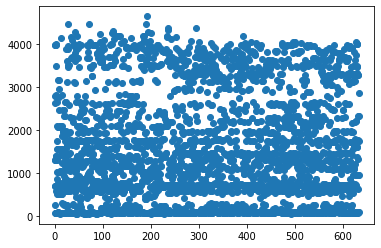

In [20]:
# Song 1
plt.scatter(*zip(*create_constellation(song1, Fs1)));

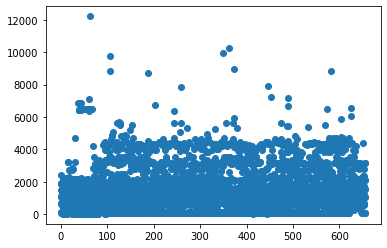

In [21]:
# Song 2
plt.scatter(*zip(*create_constellation(song2, Fs2)));

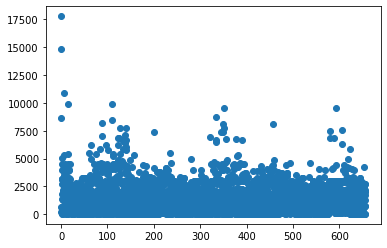

In [27]:
# Song 3
plt.scatter(*zip(*create_constellation(song3, Fs3)));

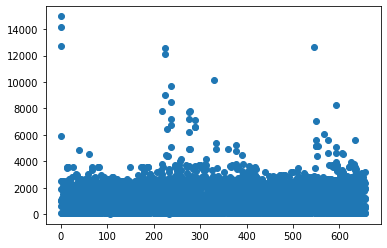

In [28]:
# Song 4
plt.scatter(*zip(*create_constellation(song4, Fs4)));

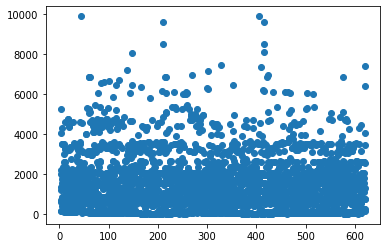

In [29]:
# Song 5
plt.scatter(*zip(*create_constellation(song5, Fs5)));

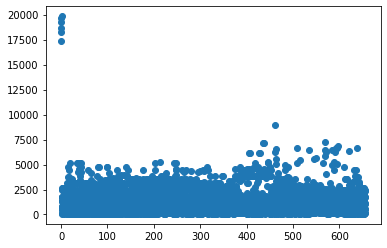

In [30]:
# Song 6
plt.scatter(*zip(*create_constellation(song6, Fs6)));

# Hashes

In [9]:
def create_hashes(constellation_map, song_id=None):
    hashes = {}
    # Use this for binning - 23_000 is slighlty higher than the maximum
    # frequency that can be stored in the .wav files, 22.05 kHz
    upper_frequency = 23_000 
    frequency_bits = 10

    # Iterate the constellation
    for idx, (time, freq) in enumerate(constellation_map):
        # Iterate the next 100 pairs to produce the combinatorial hashes
        # When we produced the constellation before, it was sorted by time already
        # So this finds the next n points in time (though they might occur at the same time)
        for other_time, other_freq in constellation_map[idx : idx + 100]: 
            diff = other_time - time
            # If the time difference between the pairs is too small or large
            # ignore this set of pairs
            if diff <= 1 or diff > 10:
                continue

            # Place the frequencies (in Hz) into a 1024 bins
            freq_binned = freq / upper_frequency * (2 ** frequency_bits)
            other_freq_binned = other_freq / upper_frequency * (2 ** frequency_bits)

            # Produce a 32 bit hash
            # Use bit shifting to move the bits to the correct location
            hash = int(freq_binned) | (int(other_freq_binned) << 10) | (int(diff) << 20)
            hashes[hash] = (time, song_id)
    return hashes


In [26]:
constellation_map1 = create_constellation(song1, Fs1)
# Investigamos los "hashes", esto es como la huella digital de la cancion
# Servira para almacenarlos y asi identficar las canciones.
hashes = create_hashes(constellation_map1, 0)

for i, (hash, (time, _)) in enumerate(hashes.items()):
    if i > 10: 
        break
    print(f"Hash {hash} occurred at {time}")

Hash 2278411 occurred at 0
Hash 2225163 occurred at 334
Hash 2128907 occurred at 619
Hash 2160651 occurred at 539
Hash 2100235 occurred at 619
Hash 3328011 occurred at 0
Hash 3176459 occurred at 150
Hash 3273739 occurred at 333
Hash 3209227 occurred at 0
Hash 3148811 occurred at 619
Hash 4353035 occurred at 0


# Base de datos canciones

In [ ]:
# glob encuentra todos los archivos de un pathname 
# si le das un tipo de archivo
songs = glob.glob('*.wav') 

song_name_index = {}
database: Dict[int, List[Tuple[int, int]]] = {}

# Iterar cada cancion en orden alfabetico (por nombre del archivo)
for index, filename in enumerate(tqdm(sorted(songs))):
    song_name_index[index] = filename

    # Leer el archivo, crear consetalcion y hashes
    Fs, audio_input = read(filename)
    constellation = create_constellation(audio_input, Fs)
    hashes = create_hashes(constellation, index)

    #Por cada hash, agrregarlos a una lista
    for hash, time_index_pair in hashes.items():
        if hash not in database:
            database[hash] = []
        database[hash].append(time_index_pair)

# Mandar la base de datos creada y lal ista de cancion a un archivo pickles
# Archivo Pickle:  implementa protocolos binarios para serializar y 
# deserializar una estructura de objetos Python
with open("database.pickle", 'wb') as db:
    pickle.dump(database, db, pickle.HIGHEST_PROTOCOL)
with open("song_index.pickle", 'wb') as songs:
    pickle.dump(song_name_index, songs, pickle.HIGHEST_PROTOCOL)

  0%|          | 0/6 [00:00<?, ?it/s]

In [41]:
songs = glob.glob('*.wav')
songs

['MillionDollarBaby_AvaMax.wav',
 'ItsOnlyAPaperMoon_NatKingCole.wav',
 'Tissues_Yungblud.wav',
 'DontMakeItLookEasy_MeghanTrainor.wav',
 'AtlantaBlues_LuisArmstrong.wav',
 'SoFarSoGood_DukeEllington.wav']

# Grafica Amplitud vs Tiempo de canciones (.wav)

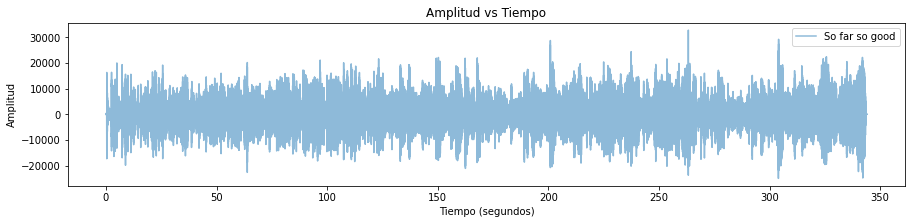

In [ ]:
# Song 1: So far so good

#Abrir el archivo y leer los frames como bytes
sonido = wave.open("SoFarSoGood_DukeEllington.wav", 'r')
signal = sonido.readframes(-1)
 
#Convertir los bytes a enteros
enteros = np.frombuffer(signal, dtype='int16')
 
#Obtener la velocidad de onda
framerate_sf = sonido.getframerate()
#Encontrar las marcas de tiempo de la onda
time_sf = np.linspace(start=0,
                     stop=len(enteros)/framerate_sf,
                     num=len(enteros))
plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(time_sf, enteros, label='So far so good', alpha=0.5)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


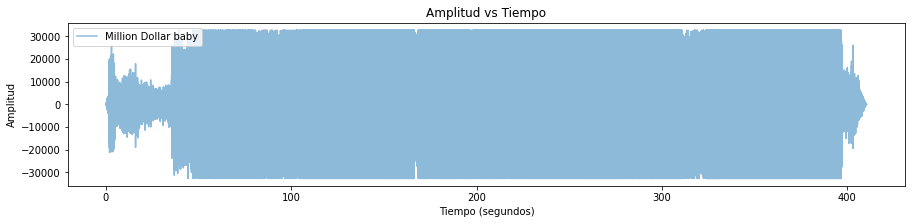

In [ ]:
#Song 2: Million Dollar Baby

sonido = wave.open("MillionDollarBaby_AvaMax.wav", 'r')
signal = sonido.readframes(-1)

enteros = np.frombuffer(signal, dtype='int16') 

framerate_sf = sonido.getframerate()

time_sf = np.linspace(start=0,
                     stop=len(enteros)/framerate_sf,
                     num=len(enteros))
plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(time_sf, enteros, label='Million Dollar baby', alpha=0.5)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


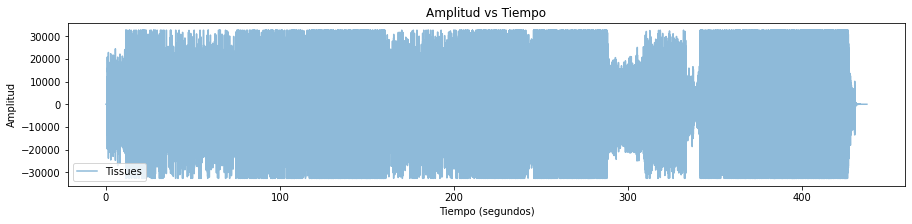

In [ ]:
#Song 3: Tissues

sonido = wave.open("Tissues_Yungblud.wav", 'r')
signal = sonido.readframes(-1)
 
enteros = np.frombuffer(signal, dtype='int16')
 
framerate_sf = sonido.getframerate()

time_sf = np.linspace(start=0,
                     stop=len(enteros)/framerate_sf,
                     num=len(enteros))
plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(time_sf, enteros, label='Tissues', alpha=0.5)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


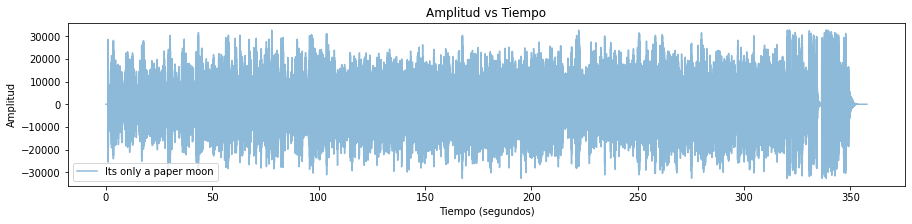

In [ ]:
#Song 4: Its only a paper moon

sonido = wave.open("ItsOnlyAPaperMoon_NatKingCole.wav", 'r')
signal = sonido.readframes(-1)
 
enteros = np.frombuffer(signal, dtype='int16')
 
framerate_sf = sonido.getframerate()

time_sf = np.linspace(start=0,
                     stop=len(enteros)/framerate_sf,
                     num=len(enteros))
plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(time_sf, enteros, label='Its only a paper moon', alpha=0.5)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


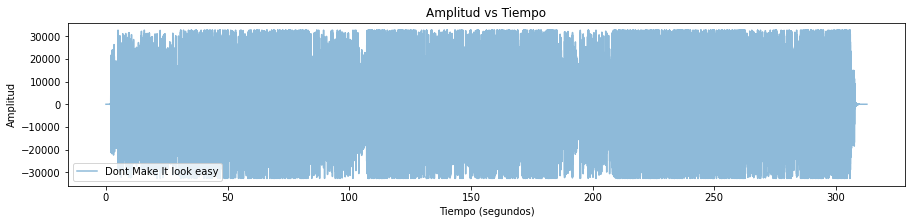

In [ ]:
#Song 5: Dont make it look easy

sonido = wave.open("DontMakeItLookEasy_MeghanTrainor.wav", 'r')
signal = sonido.readframes(-1)
 
enteros = np.frombuffer(signal, dtype='int16')
 
framerate_sf = sonido.getframerate()

time_sf = np.linspace(start=0,
                     stop=len(enteros)/framerate_sf,
                     num=len(enteros))
plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(time_sf, enteros, label='Dont Make It look easy', alpha=0.5)
plt.legend()
plt.show()

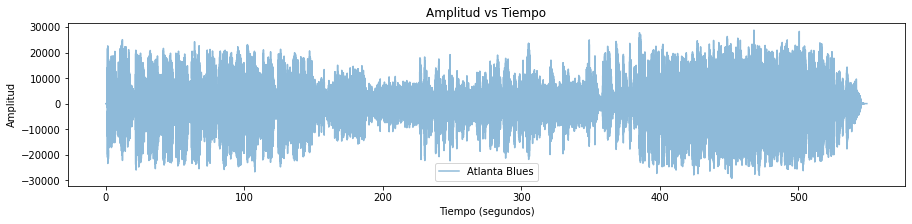

In [ ]:
#Song 6: Atlanta Blues

sonido = wave.open("AtlantaBlues_LuisArmstrong.wav", 'r')
signal = sonido.readframes(-1)
 
enteros = np.frombuffer(signal, dtype='int16')
 
framerate_sf = sonido.getframerate()

time_sf = np.linspace(start=0,
                     stop=len(enteros)/framerate_sf,
                     num=len(enteros))
plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(time_sf, enteros, label='Atlanta Blues', alpha=0.5)
plt.legend()
plt.show()

# Grafica Amplitud vs Tiempo de canciones (.csv)

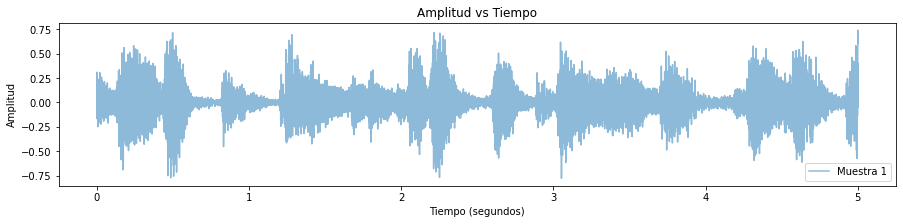

In [ ]:
# Muestra 1

#Linspace de 5 segundos
x = np.linspace(0, 5, num = 240000)

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra1_t, label='Muestra 1', alpha=0.5)
plt.legend()
plt.show()

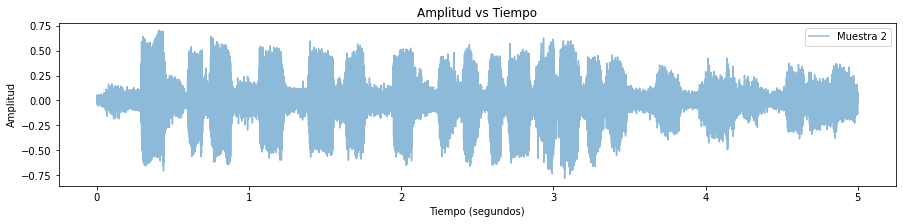

In [ ]:
# Muestra 2

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra2_t, label='Muestra 2', alpha=0.5)
plt.legend()
plt.show()

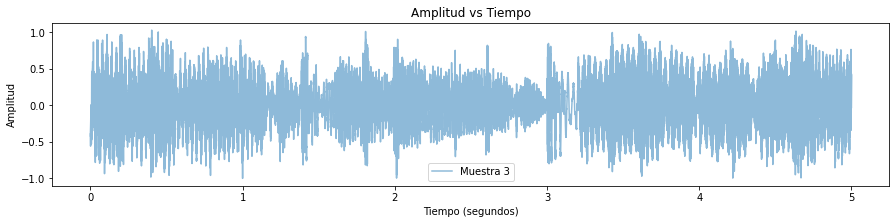

In [ ]:
# Muestra 3

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra3_t, label='Muestra 3', alpha=0.5)
plt.legend()
plt.show()

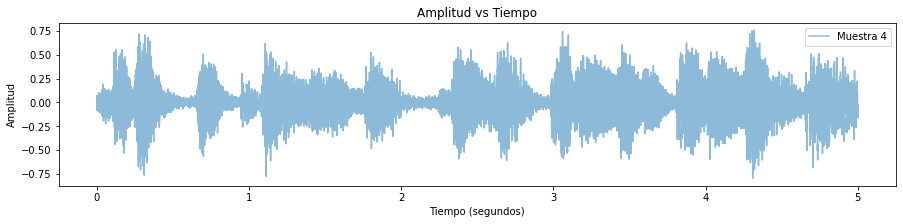

In [ ]:
# Muestra 4

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra4_t, label='Muestra 4', alpha=0.5)
plt.legend()
plt.show()

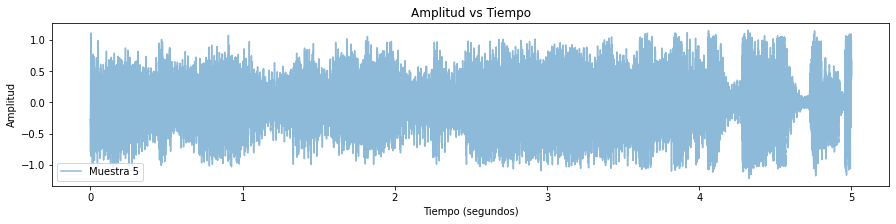

In [ ]:
# Muestra 5

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra5_t, label='Muestra 5', alpha=0.5)
plt.legend()
plt.show()

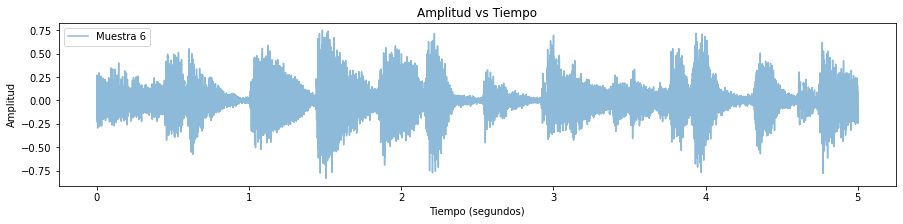

In [ ]:
# Muestra 6

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra6_t, label='Muestra 6', alpha=0.5)
plt.legend()
plt.show()

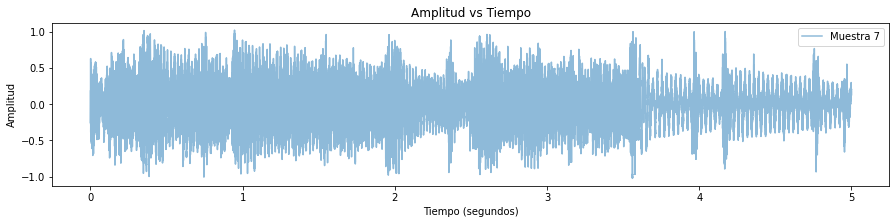

In [ ]:
# Muestra 7

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra7_t, label='Muestra 7', alpha=0.5)
plt.legend()
plt.show()

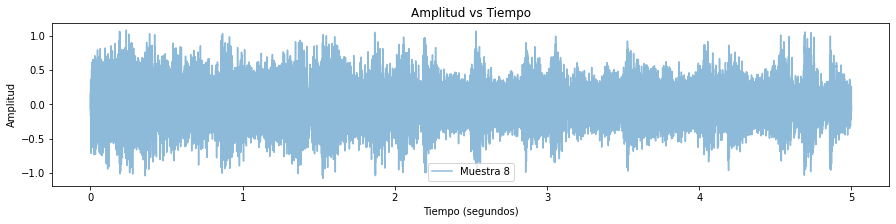

In [ ]:
# Muestra 8

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra8_t, label='Muestra 8', alpha=0.5)
plt.legend()
plt.show()

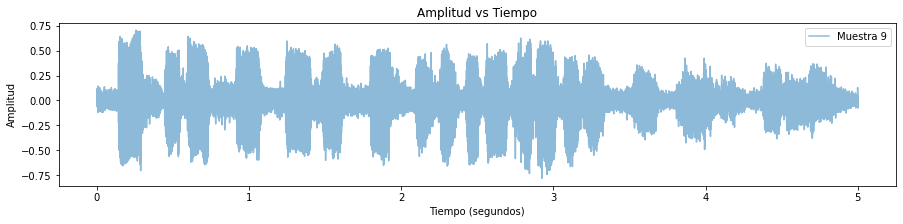

In [ ]:
# Muestra 9

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra9_t, label='Muestra 9', alpha=0.5)
plt.legend()
plt.show()

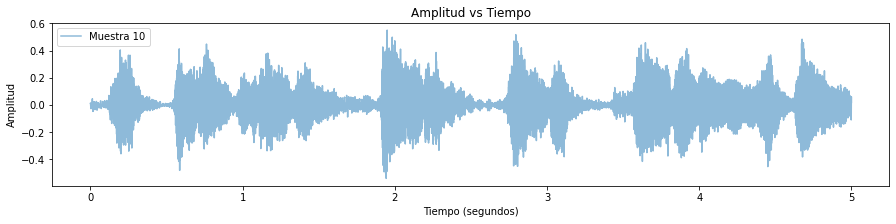

In [ ]:
# Muestra 10

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Tiempo')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (segundos)')
 
plt.plot(x, muestra10_t, label='Muestra 10', alpha=0.5)
plt.legend()
plt.show()

# Grafica Amplitud vs Frecuencia de canciones (.wav)

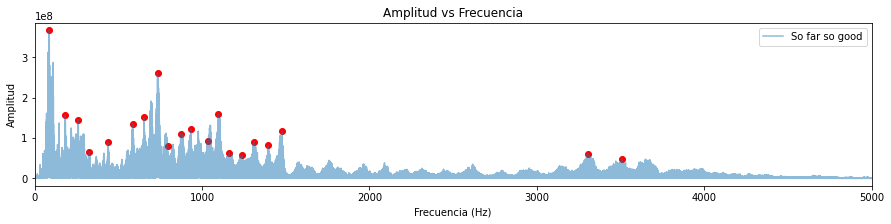

In [ ]:
# Song 1: So far so good

F1 = (Fs1/L1)*np.arange(0, L1//2)

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F1, song1_fftt, label='So far so good', alpha=0.5)
plt.scatter(F1[largest_peaks1], song1_fftt[largest_peaks1], color = "r")
plt.xlim(0,5000) 
plt.legend()
plt.show()

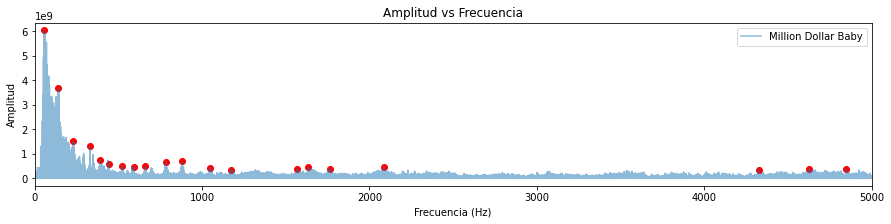

In [ ]:
#Song 2: Million Dollar Baby

F2 = (Fs2/L2)*np.arange(0, L2//2)

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F2, song2_fftt, label='Million Dollar Baby', alpha=0.5)
plt.scatter(F2[largest_peaks2], song2_fftt[largest_peaks2], color = "r")
plt.xlim(0,5000) 
plt.legend()
plt.show()

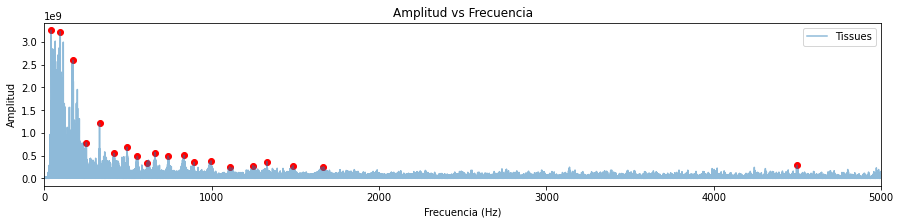

In [ ]:
#Song 3: Tissues

F3 = (Fs3/L3)*np.arange(0, L3//2)

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F3, song3_fftt, label='Tissues', alpha=0.5)
plt.scatter(F3[largest_peaks3], song3_fftt[largest_peaks3], color = "r")
plt.xlim(0,5000) 
plt.legend()
plt.show()

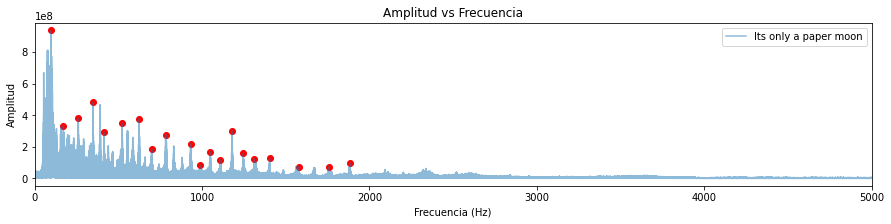

In [ ]:
#Song 4: Its only a paper moon

F4 = (Fs4/L4)*np.arange(0, L4//2)

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F4, song4_fftt, label='Its only a paper moon', alpha=0.5)
plt.scatter(F4[largest_peaks4], song4_fftt[largest_peaks4], color = "r")
plt.xlim(0,5000) 
plt.legend()
plt.show()

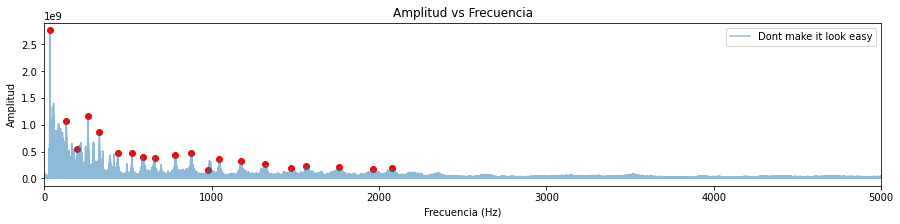

In [ ]:
#Song 5: Dont make it look easy

F5 = (Fs5/L5)*np.arange(0, L5//2)

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F5, song5_fftt, label='Dont make it look easy', alpha=0.5)
plt.scatter(F5[largest_peaks5], song5_fftt[largest_peaks5], color = "r")
plt.xlim(0,5000) 
plt.legend()
plt.show()

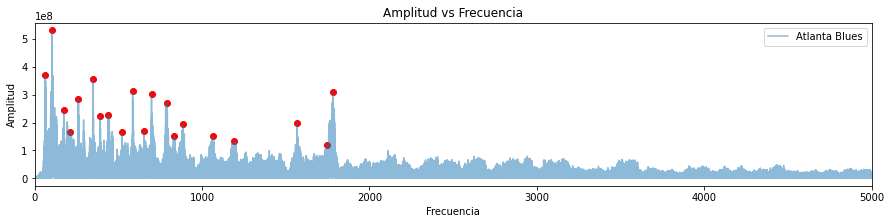

In [ ]:
#Song 6: Atlanta Blues

F6 = (Fs6/L6)*np.arange(0, L6//2)

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia')
 
plt.plot(F6, song6_fftt, label='Atlanta Blues', alpha=0.5)
plt.scatter(F6[largest_peaks6], song6_fftt[largest_peaks6], color = "r")
plt.xlim(0,5000) 
plt.legend()
plt.show()

# Grafica Amplitud vs Frecuencia de canciones (.csv)

[[0.18167806]
 [0.18872964]
 [0.19581798]
 ...
 [0.02458727]
 [0.02707225]
 [0.03178734]]


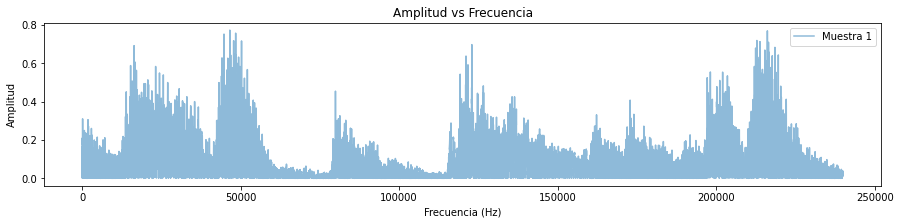

In [ ]:
# Muestra 1

Frecuencia_m = 480000

F_m = (Frecuencia_m/L_m)*np.arange(0, L_m//2)

muestra1_fft = abs(muestra1_fft)
muestra1_fft = muestra1_fft[0: L_m//2]
print(muestra1_fft)

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra1_fft, label='Muestra 1', alpha=0.5)
plt.legend()
plt.show()

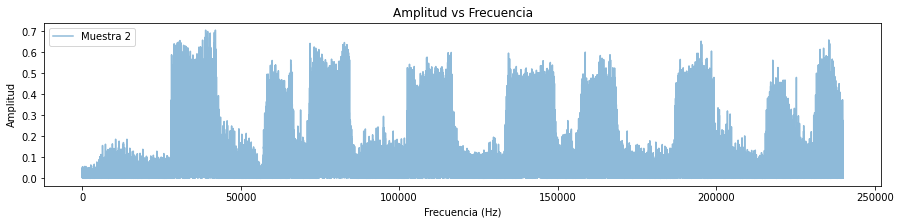

In [ ]:
# Muestra 2

muestra2_fft = abs(muestra2_fft)
muestra2_fft = muestra2_fft[: L_m//2]

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra2_fft, label='Muestra 2', alpha=0.5)
plt.legend()
plt.show()

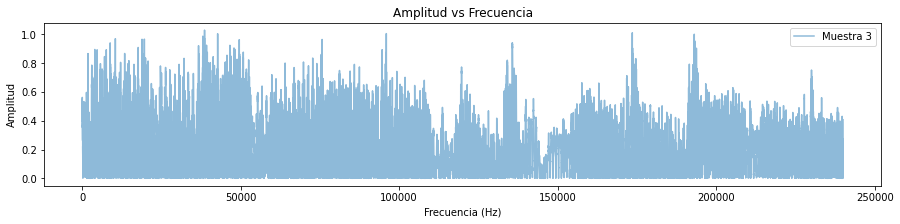

In [ ]:
# Muestra 3

muestra3_fft = abs(muestra3_fft)
muestra3_fft = muestra3_fft[: L_m//2]

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra3_fft, label='Muestra 3', alpha=0.5)
plt.legend()
plt.show()

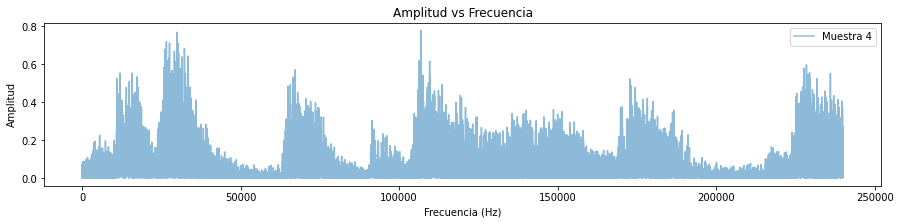

In [ ]:
# Muestra 4

muestra4_fft = abs(muestra4_fft)
muestra4_fft = muestra4_fft[: L_m//2]

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra4_fft, label='Muestra 4', alpha=0.5)
plt.legend()
plt.show()

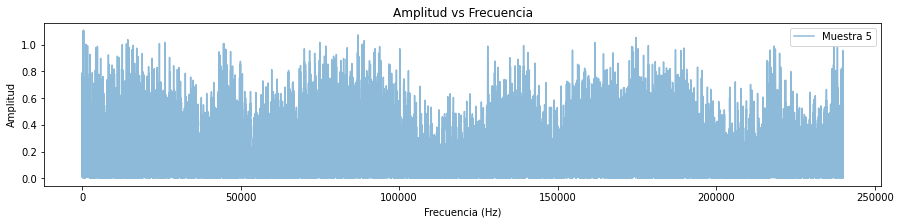

In [ ]:
# Muestra 5

muestra5_fft = abs(muestra5_fft)
muestra5_fft = muestra5_fft[: L_m//2]

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra5_fft, label='Muestra 5', alpha=0.5)
plt.legend()
plt.show()

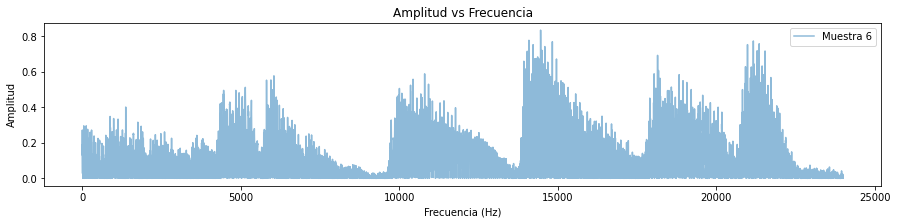

In [ ]:
# Muestra 6

muestra6_fft = abs(muestra6_fft)
muestra6_fft = muestra6_fft[: L_m//2]

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra6_fft, label='Muestra 6', alpha=0.5)
plt.legend()
plt.show()

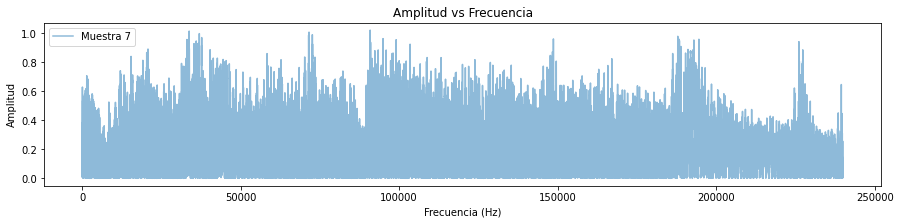

In [ ]:
# Muestra 7

muestra7_fft = abs(muestra7_fft)
muestra7_fft = muestra7_fft[: L_m//2]

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra7_fft, label='Muestra 7', alpha=0.5)
plt.legend()
plt.show()

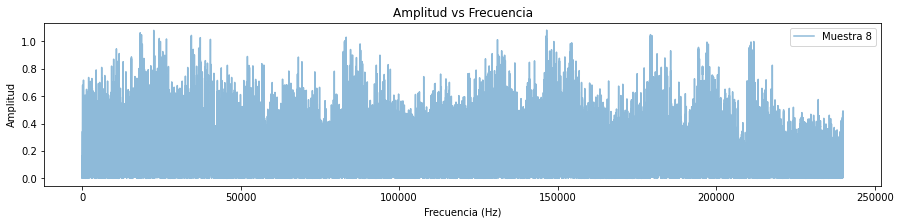

In [ ]:
# Muestra 8

muestra8_fft = abs(muestra8_fft)
muestra8_fft = muestra8_fft[: L_m//2]

plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra8_fft, label='Muestra 8', alpha=0.5)
plt.legend()
plt.show()

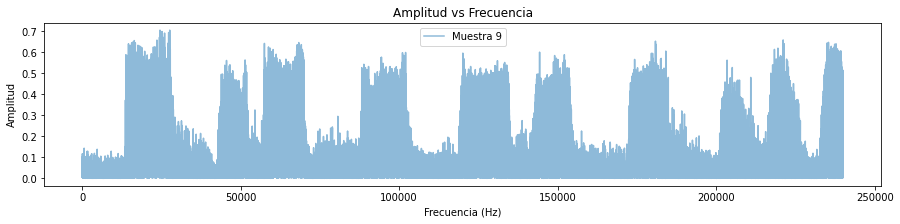

In [ ]:
# Muestra 9

muestra9_fft = abs(muestra9_fft)
muestra9_fft = muestra9_fft[: L_m//2]


plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra9_fft, label='Muestra 9', alpha=0.5)
plt.legend()
plt.show()

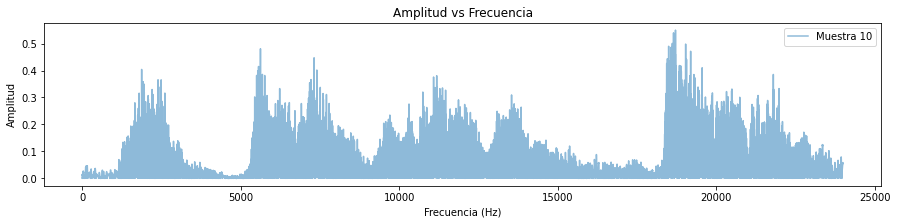

In [ ]:
# Muestra 10

muestra10_fft = abs(muestra10_fft)
muestra10_fft = muestra10_fft[: L_m//2]


plt.subplots(figsize=(15, 3))
 
plt.title('Amplitud vs Frecuencia')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
 
plt.plot(F_m, muestra10_fft, label='Muestra 10', alpha=0.5)
plt.legend()
plt.show()